## Row selection

The [select](https://datatables.net/extensions/select) extension let you select rows (or cells). When you do so,
only the selected rows are exported


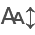

In [1]:
from itables import init_notebook_mode, show

init_notebook_mode()

In [2]:
import string

import numpy as np
import pandas as pd

from itables.sample_dfs import get_countries

df = get_countries(html=False)
# Add columns for the searchPanes demo
df["climate_zone"] = np.where(
    df["latitude"].abs() < 23.43615,
    "Tropical",
    np.where(
        df["latitude"].abs() < 35,
        "Sub-tropical",
        # Artic circle is 66.563861 but there is no capital there => using 64
        np.where(df["latitude"].abs() < 64, "Temperate", "Frigid"),
    ),
)
df["hemisphere"] = np.where(df["latitude"] > 0, "North", "South")
wide_df = pd.DataFrame(
    {
        letter: np.random.normal(size=100)
        for letter in string.ascii_lowercase + string.ascii_uppercase
    }
)

In [3]:
show(
    df,
    select=True,
    selected_rows=[2, 4, 5],
    buttons=["copyHtml5", "csvHtml5", "excelHtml5"],
)

```{tip}
It is possible to get the updated `selected_rows` back in Python but for this you will have to use,
instead of `show`, either
- the `ITable` [Jupyter Widget](widget.md)
- the `interactive_table` [Streamlit component](streamlit.md)
- or `DT` in a [Shiny app](shiny.md).
```

```{tip}
The `select` option accept multiple values, as documented [here](https://datatables.net/extensions/select):
- `select=True` or `select="os"` let you select using single click, shift-click and ctrl-click
- `select="single"` let you select a single row
- `select="multi"` for single click selection of multiple rows, `select="multi+shift"`, ...

With `select={"style": "os", "items": "cell"}` you can let the user select specific cells,
however cell selection is not taken into account when exporting the data.
```